In [1]:
import requests
import pandas as pd
import numpy as np
import time

### Getting data from a FPL API

In [3]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [4]:
r = requests.get(url)

In [5]:
json = r.json()

In [6]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [7]:
#json

### Creating a datafame of the relevant areas

These are 3 keys from the json keys list above.
Elements provides the main info, teams includes info on teams, and types on positions (I think).

In [8]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])


In [9]:
# elements_df.columns
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,None,80201,0,0,0,0,0,1,3.5,...,317,4,194,12,NaN,,NaN,,NaN,
1,NaN,None,115918,0,0,0,0,0,1,2.0,...,329,12,346,30,NaN,,NaN,,NaN,
2,NaN,None,47431,0,0,0,0,0,3,3.2,...,145,84,123,70,1.0,,2.0,,NaN,
3,NaN,None,54694,0,0,0,0,0,4,4.2,...,32,16,50,18,NaN,,NaN,,1.0,
4,NaN,None,58822,0,0,0,0,0,2,2.7,...,259,84,286,96,NaN,,5.0,,NaN,


In [10]:
# elements_types_df.columns
elements_types_df.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],45
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],158
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],191
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],57


In [46]:
# teams_df.columns
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1190,1210,1170,1210,1190,1200,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1150,1160,1150,1150,1180,1210,2
2,36,0,None,3,0,Brighton,0,0,0,BHA,...,None,False,0,1080,1100,1150,1180,1090,1100,131
3,90,0,None,4,0,Burnley,0,0,0,BUR,...,None,False,0,1050,1080,1120,1190,1010,1030,43
4,8,0,None,5,0,Chelsea,0,0,0,CHE,...,None,False,0,1260,1280,1240,1280,1270,1310,4


In [11]:
# pull out the overall data into a dataframe

elements_df = pd.DataFrame(json['elements'])

# core dataframe with key elements only

slim_elements_df = elements_df[['id',
                                'second_name',
                                'team',
                                'element_type',
                                'selected_by_percent',
                                'now_cost',
                                'minutes',
                                'transfers_in',
                                'in_dreamteam',
                                'dreamteam_count',
                                'value_season',
                                'total_points']]

In [12]:
slim_elements_df.head()

,id,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,in_dreamteam,dreamteam_count,value_season,total_points
0,1,Leno,1,1,2.2,50,3131,0,False,0,26.2,131
1,2,Rúnarsson,1,1,1.0,40,15,0,False,0,0.2,1
2,3,Borges Da Silva,1,3,0.3,65,1398,0,False,0,12.0,78
3,4,Aubameyang,1,4,3.0,100,2330,0,False,0,13.1,131
4,5,Soares,1,2,0.3,45,744,0,False,0,6.2,28


In [13]:
slim_elements_df.sum()

id                                                                101926
second_name            LenoRúnarssonBorges Da SilvaAubameyangSoaresLa...
team                                                                4694
element_type                                                        1162
selected_by_percent    2.21.00.33.00.36.90.30.20.60.30.20.80.14.60.38...
now_cost                                                           24325
minutes                                                           601550
transfers_in                                                           0
in_dreamteam                                                           0
dreamteam_count                                                        0
value_season           26.20.212.013.16.215.214.07.618.88.00.011.112....
total_points                                                       26396
dtype: object

In [16]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

<ipython-input-16-d2f8756adc31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


In [17]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

<ipython-input-17-d2f8756adc31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


In [18]:
slim_elements_df.head()

,id,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,in_dreamteam,dreamteam_count,value_season,total_points,position
0,1,Leno,1,1,2.2,50,3131,0,False,0,26.2,131,Goalkeeper
1,2,Rúnarsson,1,1,1.0,40,15,0,False,0,0.2,1,Goalkeeper
2,3,Borges Da Silva,1,3,0.3,65,1398,0,False,0,12.0,78,Midfielder
3,4,Aubameyang,1,4,3.0,100,2330,0,False,0,13.1,131,Forward
4,5,Soares,1,2,0.3,45,744,0,False,0,6.2,28,Defender


In [52]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

<ipython-input-52-f3497c573517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)


In [53]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,in_dreamteam,dreamteam_count,value_season,total_points,position
0,Özil,Arsenal,3,0.5,67,0,3441,False,0,0.0,0,Midfielder
1,Papastathopoulos,Arsenal,2,0.1,48,0,10266,False,0,0.0,0,Defender
2,Luiz Moreira Marinho,Arsenal,2,0.8,54,749,44570,False,0,4.1,22,Defender
3,Aubameyang,Arsenal,3,6.6,113,1514,561053,False,1,6.3,71,Midfielder
4,Soares,Arsenal,2,0.2,46,185,9000,False,0,3.3,15,Defender


In [54]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

<ipython-input-54-08fc0254d49f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value'] = slim_elements_df.value_season.astype(float)


In [55]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,in_dreamteam,dreamteam_count,value_season,total_points,position,value
0,Özil,Arsenal,3,0.5,67,0,3441,False,0,0.0,0,Midfielder,0.0
1,Papastathopoulos,Arsenal,2,0.1,48,0,10266,False,0,0.0,0,Defender,0.0
2,Luiz Moreira Marinho,Arsenal,2,0.8,54,749,44570,False,0,4.1,22,Defender,4.1
3,Aubameyang,Arsenal,3,6.6,113,1514,561053,False,1,6.3,71,Midfielder,6.3
4,Soares,Arsenal,2,0.2,46,185,9000,False,0,3.3,15,Defender,3.3


In [56]:
slim_elements_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,in_dreamteam,dreamteam_count,value_season,total_points,position,value
35,Martínez,Aston Villa,1,32.8,51,1620,2938758,False,1,18.2,93,Goalkeeper,18.2
597,Soucek,West Ham,3,18.2,53,1800,1994291,False,4,18.1,96,Midfielder,18.1
119,Pope,Burnley,1,11.0,54,1620,484747,True,2,17.6,95,Goalkeeper,17.6
584,Cresswell,West Ham,2,20.0,55,1800,2087474,True,2,16.7,92,Defender,16.7
50,Targett,Aston Villa,2,6.5,47,1604,774201,False,2,16.6,78,Defender,16.6
495,Bednarek,Southampton,2,12.6,49,1620,1304363,False,2,16.5,81,Defender,16.5
7,Leno,Arsenal,1,9.1,50,1800,773837,False,2,16.4,82,Goalkeeper,16.4
483,McCarthy,Southampton,1,18.8,46,1620,1223267,False,1,15.9,73,Goalkeeper,15.9
295,Bamford,Leeds,4,46.9,66,1605,5474344,True,2,15.8,104,Forward,15.8
580,Fabianski,West Ham,1,3.8,51,1710,472263,False,1,15.7,80,Goalkeeper,15.7


In [57]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
0,Defender,4.779295
3,Midfielder,4.533077
1,Forward,4.176190
2,Goalkeeper,3.917568


In [58]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [59]:
slim_elements_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 2 to 644
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   second_name          466 non-null    object 
 1   team                 466 non-null    object 
 2   element_type         466 non-null    int64  
 3   selected_by_percent  466 non-null    object 
 4   now_cost             466 non-null    int64  
 5   minutes              466 non-null    int64  
 6   transfers_in         466 non-null    int64  
 7   in_dreamteam         466 non-null    bool   
 8   dreamteam_count      466 non-null    int64  
 9   value_season         466 non-null    object 
 10  total_points         466 non-null    int64  
 11  position             466 non-null    object 
 12  value                466 non-null    float64
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 47.8+ KB


In [60]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,8.784848
0,Defender,6.345614
3,Midfielder,5.952525
1,Forward,5.481250


In [34]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team,value
1,Aston Villa,8.931579
18,West Ham,7.922727
8,Leeds,7.661905
15,Southampton,7.143478
11,Man City,6.965217
3,Burnley,6.680952
5,Crystal Palace,6.609524
16,Spurs,6.459091
4,Chelsea,6.450000
0,Arsenal,6.300000


In [61]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<AxesSubplot:>

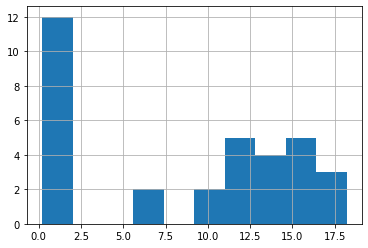

In [62]:
goal_df.value.hist()

In [63]:
goal_df.sort_values('total_points',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,in_dreamteam,dreamteam_count,value_season,total_points,position,value
119,Pope,Burnley,1,11.0,54,1620,484747,True,2,17.6,95,Goalkeeper,17.6
35,Martínez,Aston Villa,1,32.8,51,1620,2938758,False,1,18.2,93,Goalkeeper,18.2
7,Leno,Arsenal,1,9.1,50,1800,773837,False,2,16.4,82,Goalkeeper,16.4
361,Santana de Moraes,Man City,1,7.9,60,1620,597174,False,0,13.7,82,Goalkeeper,13.7
258,Schmeichel,Leicester,1,10.2,55,1800,473917,False,3,14.9,82,Goalkeeper,14.9
514,Lloris,Spurs,1,7.2,56,1710,599556,False,0,14.5,81,Goalkeeper,14.5
580,Fabianski,West Ham,1,3.8,51,1710,472263,False,1,15.7,80,Goalkeeper,15.7
483,McCarthy,Southampton,1,18.8,46,1620,1223267,False,1,15.9,73,Goalkeeper,15.9
306,Meslier,Leeds,1,5.7,47,1620,717750,False,2,15.5,73,Goalkeeper,15.5
424,Darlow,Newcastle,1,2.0,50,1845,333483,False,0,13.8,69,Goalkeeper,13.8


<AxesSubplot:>

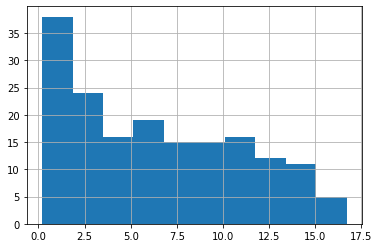

In [39]:
def_df.value.hist()

In [42]:
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
584,Cresswell,West Ham,2,19.7,55,1800,2031744,16.7,92,Defender,16.7
50,Targett,Aston Villa,2,6.1,47,1604,734576,16.6,78,Defender,16.6
495,Bednarek,Southampton,2,12.8,49,1620,1287753,16.5,81,Defender,16.5
293,Dallas,Leeds,2,13.6,48,1700,1492610,15.6,75,Defender,15.6
279,Justin,Leicester,2,26.3,50,1800,2454378,15.2,76,Defender,15.2
581,Ogbonna,West Ham,2,3.1,50,1772,361593,14.8,74,Defender,14.8
356,Stones,Man City,2,19.4,52,990,1652164,14.8,77,Defender,14.8
360,Cancelo,Man City,2,16.7,59,1279,1682874,14.6,86,Defender,14.6
494,Walker-Peters,Southampton,2,10.8,48,1620,1104669,14.6,70,Defender,14.6
376,Gato Alves Dias,Man City,2,15.8,59,1509,1490844,14.1,83,Defender,14.1


<AxesSubplot:>

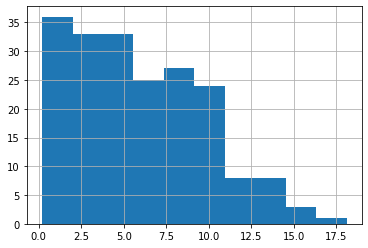

In [44]:
mid_df.value.hist()

In [45]:
mid_df.sort_values('value', ascending = False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
597,Soucek,West Ham,3,18.5,53,1800,1944021,18.1,96,Midfielder,18.1
22,Saka,Arsenal,3,11.5,54,1503,1164932,15.0,81,Midfielder,15.0
45,Grealish,Aston Villa,3,37.6,77,1617,4742731,14.7,113,Midfielder,14.7
625,Lomba Neto,Wolves,3,9.8,59,1621,1826972,14.6,86,Midfielder,14.6
521,Son,Spurs,3,59.2,98,1616,6163846,14.4,141,Midfielder,14.4
490,Ward-Prowse,Southampton,3,9.9,61,1710,1981882,14.1,86,Midfielder,14.1
296,Harrison,Leeds,3,2.2,54,1489,506707,14.1,76,Midfielder,14.1
354,Gündogan,Man City,3,13.9,57,1035,1179700,14.0,80,Midfielder,14.0
178,Zaha,Crystal Palace,3,14.8,72,1520,3780203,13.8,99,Midfielder,13.8
594,Bowen,West Ham,3,2.9,63,1542,682670,13.2,83,Midfielder,13.2


<AxesSubplot:>

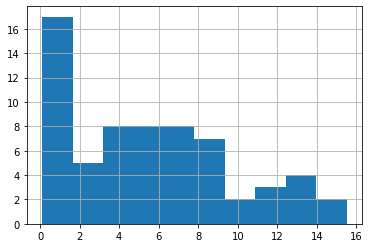

In [46]:
fwd_df.value.hist()

In [47]:
fwd_df.sort_values('value', ascending = False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
295,Bamford,Leeds,4,48.3,67,1605,5432146,15.5,104,Forward,15.5
447,Wilson,Newcastle,4,18.4,66,1597,3286540,14.7,97,Forward,14.7
63,Watkins,Aston Villa,4,13.8,62,1620,2069327,13.4,83,Forward,13.4
208,Calvert-Lewin,Everton,4,30.1,76,1493,5459141,12.8,97,Forward,12.8
519,Kane,Spurs,4,44.9,113,1654,4474637,12.7,143,Forward,12.7
496,Adams,Southampton,4,5.4,59,1507,1180284,12.5,74,Forward,12.5
79,Maupay,Brighton,4,3.2,61,1308,809091,11.6,71,Forward,11.6
265,Vardy,Leicester,4,16.5,100,1476,3379192,11.6,116,Forward,11.6
454,McGoldrick,Sheffield Utd,4,2.1,52,1180,307731,11.2,58,Forward,11.2
114,Wood,Burnley,4,1.6,62,1619,255139,9.8,61,Forward,9.8


In [48]:
fwd_df.sort_values('total_points', ascending = False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
519,Kane,Spurs,4,44.9,113,1654,4474637,12.7,143,Forward,12.7
265,Vardy,Leicester,4,16.5,100,1476,3379192,11.6,116,Forward,11.6
295,Bamford,Leeds,4,48.3,67,1605,5432146,15.5,104,Forward,15.5
208,Calvert-Lewin,Everton,4,30.1,76,1493,5459141,12.8,97,Forward,12.8
447,Wilson,Newcastle,4,18.4,66,1597,3286540,14.7,97,Forward,14.7
63,Watkins,Aston Villa,4,13.8,62,1620,2069327,13.4,83,Forward,13.4
326,Firmino,Liverpool,4,5.0,93,1596,610444,8.6,80,Forward,8.6
486,Ings,Southampton,4,8.1,84,1128,1390371,8.9,75,Forward,8.9
496,Adams,Southampton,4,5.4,59,1507,1180284,12.5,74,Forward,12.5
5,Lacazette,Arsenal,4,7.2,83,1121,921718,8.8,73,Forward,8.8


### Now looking at another FPL API to get more detailed info on a player

In [3]:
url = 'https://fantasy.premierleague.com/api/element-summary/3/'
r = requests.get(url)
json = r.json()

In [4]:
json.keys()

dict_keys(['fixtures', 'history', 'history_past'])

In [5]:
fixtures_df = pd.DataFrame(json['fixtures'])
history_df = pd.DataFrame(json['history'])


In [7]:
fixtures_df.head()

,id,code,team_h,team_h_score,team_a,team_a_score,event,finished,minutes,provisional_start_time,kickoff_time,event_name,is_home,difficulty
0,215,2128502,20,None,1,None,22,False,0,False,2021-02-02T18:00:00Z,Gameweek 22,False,3
1,219,2128506,2,None,1,None,23,False,0,False,2021-02-06T12:30:00Z,Gameweek 23,False,3
2,229,2128516,1,None,10,None,24,False,0,False,2021-02-14T16:30:00Z,Gameweek 24,True,2
3,239,2128526,1,None,12,None,25,False,0,False,2021-02-21T16:30:00Z,Gameweek 25,True,4
4,253,2128540,9,None,1,None,26,False,0,False,2021-02-28T12:00:00Z,Gameweek 26,False,4


In [8]:
history_df.head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
0,3,2,8,0,False,2020-09-12T11:30:00Z,0,3,1,0,...,0,0.0,0.0,0.0,0.0,55,0,69564,0,0
1,3,9,19,1,True,2020-09-19T19:00:00Z,2,1,2,1,...,3,0.0,0.0,0.0,0.0,55,-23455,49797,1738,25193
2,3,23,11,1,False,2020-09-28T19:00:00Z,3,1,3,90,...,11,20.2,3.2,0.0,2.3,55,711,61983,7407,6696
3,3,29,15,2,True,2020-10-04T13:00:00Z,2,1,4,90,...,13,23.0,0.8,0.0,2.4,55,1264,69592,6180,4916
4,3,44,12,2,False,2020-10-17T16:30:00Z,1,0,5,90,...,12,14.6,3.3,19.0,3.7,55,-1132,73952,5063,6195


In [9]:
history_df['opponent_team'] = history_df.opponent_team.map(teams_df.set_index('id').name)

NameError: name 'teams_df' is not defined

In [76]:
history_df.tail(5)

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,team
16,3,168,West Brom,0,False,2021-01-02T20:00:00Z,0.0,4.0,17,0,...,0.0,0.0,0.0,0.0,54,-1414,56695,73,1487,West Brom
17,3,169,Crystal Palace,5,True,2021-01-14T20:00:00Z,0.0,0.0,18,90,...,12.0,1.7,2.0,1.6,54,407,59279,1842,1435,Crystal Palace
18,3,179,Newcastle,6,True,2021-01-18T20:00:00Z,3.0,0.0,19,90,...,4.0,1.3,14.0,1.9,54,280,58406,923,643,Newcastle
19,3,197,Southampton,2,False,2021-01-26T20:15:00Z,1.0,3.0,20,90,...,3.6,0.8,0.0,0.4,54,675,59961,1774,1099,Southampton
20,3,199,Man Utd,0,True,2021-01-30T17:30:00Z,NaN,NaN,21,0,...,0.0,0.0,0.0,0.0,54,-150,60191,900,1050,Man Utd


In [78]:
history_df.columns

Index(['element', 'fixture', 'opponent_team', 'total_points', 'was_home',
       'kickoff_time', 'team_h_score', 'team_a_score', 'round', 'minutes',
       'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'value', 'transfers_balance', 'selected',
       'transfers_in', 'transfers_out', 'team'],
      dtype='object')

In [210]:
history_df5 = history_df.tail(10)
pivot = history_df5.pivot_table(index=['element','was_home'],values='total_points',aggfunc=[np.sum, np.mean]).reset_index()
pivot

pivot = history_df5.pivot_table(index='element',values='total_points',columns='was_home',aggfunc=[np.sum, np.mean]).reset_index()
pivot

pivot = history_df5.pivot_table(columns='was_home',values='total_points',aggfunc=[np.mean]).reset_index()
pivot



index  mean          
was_home               False      True
0         total_points   1.5  4.666667

In [101]:
pivot = history_df5.pivot_table(index='element',values='total_points',aggfunc=[np.sum, np.mean]).reset_index()
pivot

,element,sum,mean
,,total_points,total_points
0,3,15,1.5


## Here's start to finish what I'm trying to do
### Using FPL APIs to look at player data for most recent gameweeks only

In [2]:
# reading in the core/ general data
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

# pulling out the main general keys and put it into dataframes
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

# core dataframe with key elements only
slim_elements_df = elements_df[['id',
                                'second_name',
                                'team',
                                'element_type',
                                'selected_by_percent',
                                'now_cost',
                                'minutes',
                                'transfers_in',
                                'in_dreamteam',
                                'dreamteam_count',
                                'value_season',
                                'total_points']]
slim_elements_df

,id,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,in_dreamteam,dreamteam_count,value_season,total_points
0,1,Özil,1,3,0.5,67,0,3441,False,0,0.0,0
1,2,Papastathopoulos,1,2,0.1,48,0,10266,False,0,0.0,0
2,3,Luiz Moreira Marinho,1,2,0.8,54,886,49929,False,0,4.6,25
3,4,Aubameyang,1,3,6.5,113,1543,566073,False,1,6.4,72
4,5,Soares,1,2,0.3,46,365,18933,False,0,4.6,21
...,...,...,...,...,...,...,...,...,...,...,...,...
652,617,Söndergaard,20,1,0.3,40,0,26254,False,0,0.0,0
653,626,Cutrone,20,4,0.0,59,23,3443,False,0,0.3,2
654,629,Lonwijk,20,2,0.0,40,0,821,False,0,0.0,0
655,642,Da Silva,20,4,0.2,70,198,18828,False,0,1.1,8


In [3]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)


<ipython-input-3-bce7b1e7abbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
<ipython-input-3-bce7b1e7abbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
<ipython-input-3-bce7b1e7abbd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [4]:
# dropping all players who haven't played
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [5]:
# creating test dataframe so it's not too large
#test_df = slim_elements_df.head(3)
#test_df

#url = 'https://fantasy.premierleague.com/api/element-summary/274/'
#r = requests.get(url)
#json = r.json()
#test = pd.DataFrame(json['history'])
#test




In [6]:
#test['opponent_team'] = test.opponent_team.map(teams_df.set_index('id').name)
#test

#test2 = elements_df.loc[elements_df.second_name == 'Iheanacho']
#test2['code']

In [7]:
history_df = pd.DataFrame()

for index, row in slim_elements_df.iterrows():
    urlreq = 'https://fantasy.premierleague.com/api/element-summary/'+str(row['id'])+'/'
    response = requests.get(urlreq)
    jresponse = response.json()
    
    time.sleep(0.2)
    df_new = pd.DataFrame(jresponse['history'])
    history_df = pd.concat([history_df, df_new], axis=0)


In [8]:
history_df

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
0,3,2,8,0,False,2020-09-12T11:30:00Z,0.0,3.0,1,0,...,0,0.0,0.0,0.0,0.0,55,0,69564,0,0
1,3,9,19,1,True,2020-09-19T19:00:00Z,2.0,1.0,2,1,...,3,0.0,0.0,0.0,0.0,55,-23455,49797,1738,25193
2,3,23,11,1,False,2020-09-28T19:00:00Z,3.0,1.0,3,90,...,11,20.2,3.2,0.0,2.3,55,711,61983,7407,6696
3,3,29,15,2,True,2020-10-04T13:00:00Z,2.0,1.0,4,90,...,13,23.0,0.8,0.0,2.4,55,1264,69592,6180,4916
4,3,44,12,2,False,2020-10-17T16:30:00Z,1.0,0.0,5,90,...,12,14.6,3.3,19.0,3.7,55,-1132,73952,5063,6195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,626,202,6,0,False,2021-01-30T15:00:00Z,1.0,0.0,21,0,...,0,0.0,0.0,0.0,0.0,59,-314,1347,180,494
4,626,215,1,0,True,2021-02-02T18:00:00Z,2.0,1.0,22,0,...,0,0.0,0.0,0.0,0.0,59,-432,924,70,502
0,642,194,5,1,False,2021-01-27T18:00:00Z,0.0,0.0,20,18,...,3,6.0,0.3,0.0,0.6,70,1647,1743,2105,458
1,642,202,6,2,False,2021-01-30T15:00:00Z,1.0,0.0,21,90,...,3,7.0,1.9,60.0,6.9,70,6752,8808,7597,845


#### Re-formatting variables where necessary

In [9]:
# Renaming 'round' to gameweek (as former is a function)
history_df.rename(columns={'round': 'gameweek'}, inplace=True)

# Adding in second name so players can be identified
history_df['second_name'] = history_df.element.map(slim_elements_df.set_index('id').second_name)
history_df

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,gameweek,minutes,...,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,second_name
0,3,2,8,0,False,2020-09-12T11:30:00Z,0.0,3.0,1,0,...,0.0,0.0,0.0,0.0,55,0,69564,0,0,Luiz Moreira Marinho
1,3,9,19,1,True,2020-09-19T19:00:00Z,2.0,1.0,2,1,...,0.0,0.0,0.0,0.0,55,-23455,49797,1738,25193,Luiz Moreira Marinho
2,3,23,11,1,False,2020-09-28T19:00:00Z,3.0,1.0,3,90,...,20.2,3.2,0.0,2.3,55,711,61983,7407,6696,Luiz Moreira Marinho
3,3,29,15,2,True,2020-10-04T13:00:00Z,2.0,1.0,4,90,...,23.0,0.8,0.0,2.4,55,1264,69592,6180,4916,Luiz Moreira Marinho
4,3,44,12,2,False,2020-10-17T16:30:00Z,1.0,0.0,5,90,...,14.6,3.3,19.0,3.7,55,-1132,73952,5063,6195,Luiz Moreira Marinho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,626,202,6,0,False,2021-01-30T15:00:00Z,1.0,0.0,21,0,...,0.0,0.0,0.0,0.0,59,-314,1347,180,494,Cutrone
4,626,215,1,0,True,2021-02-02T18:00:00Z,2.0,1.0,22,0,...,0.0,0.0,0.0,0.0,59,-432,924,70,502,Cutrone
0,642,194,5,1,False,2021-01-27T18:00:00Z,0.0,0.0,20,18,...,6.0,0.3,0.0,0.6,70,1647,1743,2105,458,Da Silva
1,642,202,6,2,False,2021-01-30T15:00:00Z,1.0,0.0,21,90,...,7.0,1.9,60.0,6.9,70,6752,8808,7597,845,Da Silva


#### Subsetting to 5 previous gameweeks to get the more recent picuture

In [22]:
presentGW = history_df['gameweek'].max()

# also I think this includes the present gameweek so could do with removing that too
history_recent_df = history_df.loc[(history_df.gameweek > presentGW - 6) & (history_df.gameweek < presentGW)]
history_recent_df

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,gameweek,minutes,...,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,second_name
19,3,197,16,2,False,2021-01-26T20:15:00Z,1.0,3.0,20,90,...,3.6,0.8,0.0,0.4,54,675,59961,1774,1099,Luiz Moreira Marinho
20,3,199,13,6,True,2021-01-30T17:30:00Z,0.0,0.0,21,90,...,13.8,0.8,30.0,4.5,54,-150,60191,900,1050,Luiz Moreira Marinho
21,3,215,20,-3,False,2021-02-02T18:00:00Z,2.0,1.0,22,47,...,0.0,0.3,2.0,0.0,54,4349,65560,5240,891,Luiz Moreira Marinho
19,4,197,16,0,False,2021-01-26T20:15:00Z,1.0,3.0,20,0,...,0.0,0.0,0.0,0.0,113,4886,548082,36694,31808,Aubameyang
20,4,199,13,0,True,2021-01-30T17:30:00Z,0.0,0.0,21,0,...,0.0,0.0,0.0,0.0,113,-22681,524991,1164,23845,Aubameyang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,626,202,6,0,False,2021-01-30T15:00:00Z,1.0,0.0,21,0,...,0.0,0.0,0.0,0.0,59,-314,1347,180,494,Cutrone
4,626,215,1,0,True,2021-02-02T18:00:00Z,2.0,1.0,22,0,...,0.0,0.0,0.0,0.0,59,-432,924,70,502,Cutrone
0,642,194,5,1,False,2021-01-27T18:00:00Z,0.0,0.0,20,18,...,6.0,0.3,0.0,0.6,70,1647,1743,2105,458,Da Silva
1,642,202,6,2,False,2021-01-30T15:00:00Z,1.0,0.0,21,90,...,7.0,1.9,60.0,6.9,70,6752,8808,7597,845,Da Silva


#### Collapsing to player level using groupby

In [23]:
# taking a look at total points
pivot = history_recent_df.pivot_table(index='element',values='total_points',aggfunc=[np.sum, np.mean]).reset_index()
pivot

,element,sum,mean
,,total_points,total_points
0,3,5,1.666667
1,4,1,0.333333
2,5,8,2.666667
3,6,17,5.666667
4,7,0,0.000000
...,...,...,...
467,630,0,0.000000
468,642,8,2.666667
469,645,1,0.500000


In [24]:
history_recent_df.columns

Index(['element', 'fixture', 'opponent_team', 'total_points', 'was_home',
       'kickoff_time', 'team_h_score', 'team_a_score', 'gameweek', 'minutes',
       'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'value', 'transfers_balance', 'selected',
       'transfers_in', 'transfers_out', 'second_name'],
      dtype='object')

In [25]:
#recentHist_player_level_df.groupby(['second_name']).mean()
#someStats_df = history_recent_df.groupby('second_name').agg({'total_points': ['sum', 'mean'],
#                                                             'minutes': ['mean']
#                                                            }).reset_index()
#someStats_df.columns = ['_'.join(col).strip('_') for col in someStats_df.columns.values]



#someStats2_df = history_recent_df.pivot_table(index='second_name',columns='was_home',values='total_points',aggfunc=[np.mean]).reset_index()
#someStats2_df.columns = ['_'.join(col).strip('_') for col in someStats2_df.columns.values]
#someStats2_df.columns = someStats2_df.columns.get_level_values(0)
#someStats2_df.rename(columns={'': 'second_name','False':'mean_points_away','True':'mean_points_home'}, inplace=True)
#someStats2_df

someStats_df = history_recent_df.pivot_table(index='element',values='total_points',aggfunc=[np.sum, np.mean]).reset_index()
someStats_df.columns = ['_'.join(col).strip('_') for col in someStats_df.columns.values]
someStats_df.rename(columns={'element':'id','sum_total_points': 'rec_total_points','mean_total_points':'rec_ave_points'}, inplace=True)

someStats2_df = history_recent_df.pivot_table(index='element',values='minutes',aggfunc=[np.mean]).reset_index()
someStats2_df.columns = ['_'.join(col).strip('_') for col in someStats2_df.columns.values]
someStats2_df.rename(columns={'element':'id','mean_minutes': 'rec_ave_mins'}, inplace=True)
someStats2_df



,id,rec_ave_mins
0,3,75.666667
1,4,9.666667
2,5,90.000000
3,6,75.000000
4,7,0.000000
...,...,...
467,630,0.000000
468,642,66.000000
469,645,3.500000
470,648,56.000000


#### Other data items to consider
*  number or % of 5 previous games played to full 90 mins
*  number of previous matches not played (minutes = 0)
*  number or % of matches with 0 or 1 point
*  number or % of matches where bonus was achieved (>0)
*  mean points at home and mean points away
*  mean total_points of matches actually played

Then look at merging this with slim elements
then look at calculating recent value 
then look at splitting by position and getting the top 5 for points in each case

In [26]:
#test = history_recent_df.loc[history_recent_df.second_name == 'Iheanacho']

#pivot = test.pivot_table(index='element',values='total_points',aggfunc=[np.sum, np.mean]).reset_index()
#test

#### Merging recent gameweek summary stats with slim_elements

In [27]:
recent_elements_df = pd.merge(slim_elements_df, someStats_df, on='id')
recent_elements_df = pd.merge(recent_elements_df, someStats2_df, on='id')
recent_elements_df

,id,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,in_dreamteam,dreamteam_count,value_season,total_points,position,value,rec_total_points,rec_ave_points,rec_ave_mins
0,3,Luiz Moreira Marinho,Arsenal,2,0.8,54,886,49929,False,0,4.6,25,Defender,4.6,5,1.666667,75.666667
1,4,Aubameyang,Arsenal,3,6.5,113,1543,566073,False,1,6.4,72,Midfielder,6.4,1,0.333333,9.666667
2,5,Soares,Arsenal,2,0.3,46,365,18933,False,0,4.6,21,Defender,4.6,8,2.666667,90.000000
3,6,Lacazette,Arsenal,4,7.8,84,1256,1120260,False,2,9.4,79,Forward,9.4,17,5.666667,75.000000
4,7,Mustafi,Arsenal,2,0.1,50,45,13464,False,0,0.6,3,Defender,0.6,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,546,Cabral Semedo,Wolves,2,1.9,53,1679,404448,False,0,8.7,46,Defender,8.7,10,3.333333,90.000000
468,563,Ait Nouri,Wolves,2,0.1,50,689,48774,False,1,6.4,32,Defender,6.4,1,0.333333,15.000000
469,581,Otasowie,Wolves,3,0.0,45,114,3438,False,0,1.3,6,Midfielder,1.3,0,0.000000,0.000000
470,626,Cutrone,Wolves,4,0.0,59,23,3443,False,0,0.3,2,Forward,0.3,0,0.000000,0.000000


#### Calculating recent value

In [28]:
recent_elements_df['recent_value'] = recent_elements_df['rec_total_points']/(recent_elements_df['now_cost']/10)
recent_elements_df

,id,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,in_dreamteam,dreamteam_count,value_season,total_points,position,value,rec_total_points,rec_ave_points,rec_ave_mins,recent_value
0,3,Luiz Moreira Marinho,Arsenal,2,0.8,54,886,49929,False,0,4.6,25,Defender,4.6,5,1.666667,75.666667,0.925926
1,4,Aubameyang,Arsenal,3,6.5,113,1543,566073,False,1,6.4,72,Midfielder,6.4,1,0.333333,9.666667,0.088496
2,5,Soares,Arsenal,2,0.3,46,365,18933,False,0,4.6,21,Defender,4.6,8,2.666667,90.000000,1.739130
3,6,Lacazette,Arsenal,4,7.8,84,1256,1120260,False,2,9.4,79,Forward,9.4,17,5.666667,75.000000,2.023810
4,7,Mustafi,Arsenal,2,0.1,50,45,13464,False,0,0.6,3,Defender,0.6,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,546,Cabral Semedo,Wolves,2,1.9,53,1679,404448,False,0,8.7,46,Defender,8.7,10,3.333333,90.000000,1.886792
468,563,Ait Nouri,Wolves,2,0.1,50,689,48774,False,1,6.4,32,Defender,6.4,1,0.333333,15.000000,0.200000
469,581,Otasowie,Wolves,3,0.0,45,114,3438,False,0,1.3,6,Midfielder,1.3,0,0.000000,0.000000,0.000000
470,626,Cutrone,Wolves,4,0.0,59,23,3443,False,0,0.3,2,Forward,0.3,0,0.000000,0.000000,0.000000


#### Cutting down to key stats

In [29]:
recent_elements_slim_df = recent_elements_df[['second_name','team','position','rec_ave_points','rec_total_points','total_points','rec_ave_mins','minutes','recent_value','value','now_cost']]

In [30]:
fwd_df = recent_elements_slim_df.loc[recent_elements_slim_df.position == 'Forward']
mid_df = recent_elements_slim_df.loc[recent_elements_slim_df.position == 'Midfielder']
def_df = recent_elements_slim_df.loc[recent_elements_slim_df.position == 'Defender']
goal_df = recent_elements_slim_df.loc[recent_elements_slim_df.position == 'Goalkeeper']

In [31]:
fwd_df.sort_values('rec_total_points',ascending=False).head(10)

,second_name,team,position,rec_ave_points,rec_total_points,total_points,rec_ave_mins,minutes,recent_value,value,now_cost
323,Wilson,Newcastle,Forward,7.666667,23,115,90.000000,1777,3.382353,16.9,68
216,Bamford,Leeds,Forward,7.000000,21,124,79.666667,1785,3.181818,18.8,66
3,Lacazette,Arsenal,Forward,5.666667,17,79,75.000000,1256,2.023810,9.4,84
269,de Jesus,Man City,Forward,5.333333,16,51,70.000000,984,1.739130,5.5,92
287,Martial,Man Utd,Forward,5.333333,16,65,62.666667,1245,1.839080,7.5,87
237,Firmino,Liverpool,Forward,4.333333,13,86,59.333333,1686,1.368421,9.1,95
328,Sharp,Sheffield Utd,Forward,4.000000,12,30,55.333333,401,2.181818,5.5,55
432,Antonio,West Ham,Forward,4.000000,12,60,77.333333,971,1.818182,9.1,66
128,Ayew,Crystal Palace,Forward,3.333333,10,43,65.666667,1048,1.785714,7.7,56
42,Watkins,Aston Villa,Forward,3.333333,10,87,83.666667,1778,1.587302,13.8,63


In [32]:
mid_df.sort_values('rec_total_points',ascending=False).head(10)

,second_name,team,position,rec_ave_points,rec_total_points,total_points,rec_ave_mins,minutes,recent_value,value,now_cost
229,Dias Belloli,Leeds,Midfielder,8.333333,25,67,86.333333,1166,4.629630,12.4,54
441,Soucek,West Ham,Midfielder,8.000000,24,105,84.000000,1958,4.528302,19.8,53
258,Gündogan,Man City,Midfielder,7.666667,23,89,77.000000,1215,3.965517,15.3,58
286,Borges Fernandes,Man Utd,Midfielder,7.333333,22,162,90.000000,1835,1.929825,14.2,114
134,Eze,Crystal Palace,Midfielder,6.666667,20,72,90.000000,1408,3.448276,12.4,58
263,Sterling,Man City,Midfielder,6.333333,19,105,60.000000,1528,1.637931,9.1,116
54,Trossard,Brighton,Midfielder,6.333333,19,74,79.666667,1418,3.333333,13.0,57
242,Salah,Liverpool,Midfielder,6.333333,19,148,84.666667,1720,1.496063,11.7,127
87,McNeil,Burnley,Midfielder,5.666667,17,56,90.000000,1596,2.982456,9.8,57
217,Harrison,Leeds,Midfielder,5.666667,17,86,88.666667,1665,3.148148,15.9,54


In [33]:
def_df.sort_values('rec_total_points',ascending=False).head(10)

,second_name,team,position,rec_ave_points,rec_total_points,total_points,rec_ave_mins,minutes,recent_value,value,now_cost
295,Wan-Bissaka,Man Utd,Defender,8.666667,26,89,90.000000,1800,4.814815,16.5,54
264,Cancelo,Man City,Defender,7.666667,23,92,51.000000,1342,3.833333,15.3,60
446,Dawson,West Ham,Defender,7.333333,22,42,84.000000,608,4.888889,9.3,45
92,Azpilicueta,Chelsea,Defender,7.333333,22,53,60.000000,860,3.928571,9.5,56
277,Gato Alves Dias,Man City,Defender,6.666667,20,97,90.000000,1689,3.333333,16.2,60
56,White,Brighton,Defender,6.666667,20,61,83.666667,1828,4.545455,13.9,44
245,Alexander-Arnold,Liverpool,Defender,6.000000,18,71,83.666667,1644,2.432432,9.6,74
51,Webster,Brighton,Defender,6.000000,18,59,83.666667,1869,4.090909,13.4,44
49,Dunk,Brighton,Defender,6.000000,18,63,83.666667,1689,3.750000,13.1,48
283,Maguire,Man Utd,Defender,6.000000,18,79,90.000000,1980,3.272727,14.4,55


In [34]:
goal_df.sort_values('rec_total_points',ascending=False).head(10)

,second_name,team,position,rec_ave_points,rec_total_points,total_points,rec_ave_mins,minutes,recent_value,value,now_cost
66,Sánchez,Brighton,Goalkeeper,6.666667,20,46,83.666667,969,4.545455,10.5,44
265,Santana de Moraes,Man City,Goalkeeper,5.666667,17,93,90.000000,1800,2.786885,15.2,61
279,de Gea,Man Utd,Goalkeeper,4.666667,14,72,90.000000,1755,2.641509,13.6,53
449,dos Santos Patrício,Wolves,Goalkeeper,4.333333,13,69,90.000000,1980,2.407407,12.8,54
177,Areola,Fulham,Goalkeeper,4.333333,13,71,90.000000,1800,2.888889,15.8,45
26,Martínez,Aston Villa,Goalkeeper,4.333333,13,105,83.666667,1778,2.500000,20.2,52
118,Guaita,Crystal Palace,Goalkeeper,4.333333,13,75,90.000000,1980,2.708333,15.6,48
114,Mendy,Chelsea,Goalkeeper,4.000000,12,71,60.000000,1530,2.352941,13.9,51
185,Schmeichel,Leicester,Goalkeeper,3.333333,10,90,90.000000,1980,1.818182,16.4,55
344,Ramsdale,Sheffield Utd,Goalkeeper,3.000000,9,56,90.000000,1980,1.956522,12.2,46


## End

In [46]:
# Trying to build a predictive model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import linear_model

<AxesSubplot:>

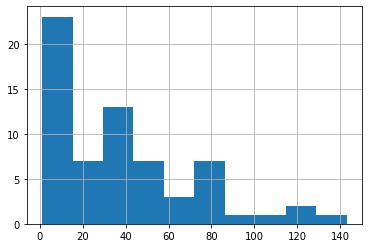

In [27]:

fwd_df.total_points.hist()

In [33]:
#presentGW = history_df['gameweek'].max()
predict_test_df = history_df.loc[history_df.gameweek < presentGW - 2]
predict_test_result_df = history_df.loc[history_df.gameweek >= presentGW - 2]
predict_test_df.columns
predict_test_df.head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,gameweek,minutes,...,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,second_name
0,3,2,8,0,False,2020-09-12T11:30:00Z,0,3,1,0,...,0.0,0.0,0.0,0.0,55,0,69564,0,0,Luiz Moreira Marinho
1,3,9,19,1,True,2020-09-19T19:00:00Z,2,1,2,1,...,0.0,0.0,0.0,0.0,55,-23455,49797,1738,25193,Luiz Moreira Marinho
2,3,23,11,1,False,2020-09-28T19:00:00Z,3,1,3,90,...,20.2,3.2,0.0,2.3,55,711,61983,7407,6696,Luiz Moreira Marinho
3,3,29,15,2,True,2020-10-04T13:00:00Z,2,1,4,90,...,23.0,0.8,0.0,2.4,55,1264,69592,6180,4916,Luiz Moreira Marinho
4,3,44,12,2,False,2020-10-17T16:30:00Z,1,0,5,90,...,14.6,3.3,19.0,3.7,55,-1132,73952,5063,6195,Luiz Moreira Marinho


In [39]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(predict_test_df, columns=['opponent_team',
                                            'influence',
                                            'creativity',
                                            'threat',
                                            'ict_index'
                                           ])

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(predict_test_df, columns=['total_points'])
target
df

,opponent_team,influence,creativity,threat,ict_index
0,8,0.0,0.0,0.0,0.0
1,19,0.0,0.0,0.0,0.0
2,11,20.2,3.2,0.0,2.3
3,15,23.0,0.8,0.0,2.4
4,12,14.6,3.3,19.0,3.7
...,...,...,...,...,...
10,17,5.2,0.5,0.0,0.6
11,13,0.0,0.0,0.0,0.0
12,3,0.2,0.0,4.0,0.4
13,7,0.0,0.0,0.0,0.0


In [36]:
X = df["opponent_team"]
y = target["total_points"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total_points   R-squared (uncentered):                   0.230
Model:                            OLS   Adj. R-squared (uncentered):              0.230
Method:                 Least Squares   F-statistic:                              2298.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):                        0.00
Time:                        17:11:11   Log-Likelihood:                         -19179.
No. Observations:                7691   AIC:                                  3.836e+04
Df Residuals:                    7690   BIC:                                  3.837e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
opponent_team     0.1330      0.003     47.937      0.000       0.128       0.138
==============================================================================
Omnibus:                     3510.640   Durbin-Watson:                   1.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18929.043
Skew:                           2.178   Prob(JB):                         0.00
Kurtosis:                       9.332   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
X = df
y = target['total_points']
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

LinearRegression()

In [48]:
predictions = lm.predict(X)
print(predictions)[0:5]

[0.22506615 0.18489768 3.35788343 ... 0.39139917 0.22871783 0.22871783]


TypeError: 'NoneType' object is not subscriptable